## This dataframe compares Sharon's counts gene_counts.tsv with my BLAST gene counts, patid_family_count_df.pkl

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
%matplotlib inline

In [2]:
sharon_counts_df = pd.read_csv("gene_counts.tsv", delimiter="\t")
sharon_counts_df = sharon_counts_df.reset_index()
sharon_counts_df.head()

,index,LD0001,LD0002,LD0003,LD0006,LD0007,LD0008,LD0009,LD0011,LD0012,...,LD1349,LD1350,LD1353,LD1354,LD1356,LD1357,LD1361,LD1362,LD1364,LD1366
0,TRAC,28047,39020,28044,35154,40934,27600,17414,29114,46290,...,44721,30211,26724,47570,35740,25508,39323,47095,60857,47552
1,TRAJ1,7,8,10,4,6,0,7,6,9,...,8,3,4,6,8,2,13,13,12,2
2,TRAJ10,41,53,66,37,68,43,17,55,89,...,58,34,30,79,42,30,63,59,89,40
3,TRAJ11,16,16,22,18,27,14,10,24,20,...,16,21,11,38,29,18,36,31,29,20
4,TRAJ12,36,53,35,47,44,36,21,27,100,...,42,34,37,58,33,26,35,22,60,36


In [4]:
sharon_counts_df = pd.read_csv("gene_counts.tsv", delimiter="\t")

In [7]:
sharon_counts_df = sharon_counts_df.transpose()

In [8]:
sharon_counts_df

,TRAC,TRAJ1,TRAJ10,TRAJ11,TRAJ12,TRAJ13,TRAJ15,TRAJ16,TRAJ17,TRAJ18,...,TRGV2,TRGV3,TRGV4,TRGV5,TRGV5P,TRGV7,TRGV8,TRGV9,TRGVA,TRGVB
LD0001,28047,7,41,16,36,40,15,25,21,37,...,33,27,36,18,49,44,30,174,3,7
LD0002,39020,8,53,16,53,63,34,8,34,50,...,37,53,61,11,4,41,33,99,4,6
LD0003,28044,10,66,22,35,34,26,22,30,26,...,108,89,194,34,25,102,119,185,20,7
LD0006,35154,4,37,18,47,51,26,30,32,49,...,40,76,91,17,11,62,56,180,5,4
LD0007,40934,6,68,27,44,51,46,24,44,54,...,75,22,48,13,17,35,49,106,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LD1357,25508,2,30,18,26,52,19,17,19,23,...,40,25,49,15,22,38,57,152,25,2
LD1361,39323,13,63,36,35,64,37,23,32,42,...,44,93,177,52,104,35,32,149,5,3
LD1362,47095,13,59,31,22,61,17,25,27,54,...,203,82,117,14,25,62,74,521,6,6
LD1364,60857,12,89,29,60,66,56,28,95,69,...,222,215,287,64,30,44,214,465,17,4


In [10]:
TRAV8_cols = [x for x in sharon_counts_df.columns if x.startswith("TRAV8")]

In [12]:
sharon_TRAV8_table = sharon_counts_df[TRAV8_cols]

In [15]:
sharon_TRAV8_df = pd.melt(sharon_TRAV8_table).rename(columns={"variable":"family", "value":"count"})

Text(0.5, 1.0, 'Sharon TRAV8-x distribution')

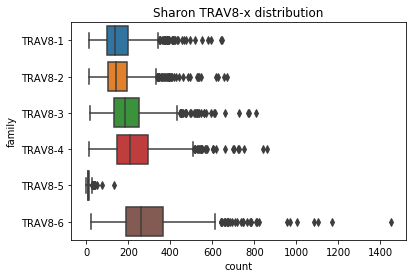

In [17]:
sns.boxplot(x="count", y="family", data=sharon_TRAV8_df)
plt.title("Sharon TRAV8-x distribution")

In [3]:
f = open("/home/ashteng/allJCodes.txt", "r")
all_j_codes = set([x.strip() for x in f.readlines()])


In [4]:
sharon_patid_family_count_df = pd.melt(sharon_counts_df, id_vars=['index']).rename(columns={"index":"family","variable":"patid", "value":"count"})
sharon_patid_family_count_df

,family,patid,count
0,TRAC,LD0001,28047
1,TRAJ1,LD0001,7
2,TRAJ10,LD0001,41
3,TRAJ11,LD0001,16
4,TRAJ12,LD0001,36
...,...,...,...
152145,TRGV7,LD1366,31
152146,TRGV8,LD1366,32
152147,TRGV9,LD1366,298
152148,TRGVA,LD1366,1


## first generate an usage df

In [5]:
sharon_patid_family_count_df['segment'] = sharon_patid_family_count_df['family'].str.slice(start=2, stop=4)

In [7]:
sharon_patid_family_count_df

,family,patid,count,segment
0,TRAC,LD0001,28047,AC
1,TRAJ1,LD0001,7,AJ
2,TRAJ10,LD0001,41,AJ
3,TRAJ11,LD0001,16,AJ
4,TRAJ12,LD0001,36,AJ
...,...,...,...,...
152145,TRGV7,LD1366,31,GV
152146,TRGV8,LD1366,32,GV
152147,TRGV9,LD1366,298,GV
152148,TRGVA,LD1366,1,GV


In [9]:
segment_count_df = sharon_patid_family_count_df.groupby(["patid", "segment"]).sum().rename(columns={"count":"segment_count"}).reset_index()
segment_count_df

,patid,segment,segment_count
0,LD0001,AC,28047
1,LD0001,AJ,1476
2,LD0001,AV,7032
3,LD0001,BC,34477
4,LD0001,BJ,1856
...,...,...,...
10735,LD1366,DJ,239
10736,LD1366,DV,458
10737,LD1366,GC,1901
10738,LD1366,GJ,33


In [10]:
df_with_total = pd.merge(sharon_patid_family_count_df, segment_count_df, how="inner", on=["patid", "segment"])

In [11]:
df_with_total["usage_ratio"] = df_with_total["count"]/df_with_total["segment_count"]

In [12]:
df_with_total

,family,patid,count,segment,segment_count,usage_ratio
0,TRAC,LD0001,28047,AC,28047,1.000000
1,TRAJ1,LD0001,7,AJ,1476,0.004743
2,TRAJ10,LD0001,41,AJ,1476,0.027778
3,TRAJ11,LD0001,16,AJ,1476,0.010840
4,TRAJ12,LD0001,36,AJ,1476,0.024390
...,...,...,...,...,...,...
152145,TRGV7,LD1366,31,GV,578,0.053633
152146,TRGV8,LD1366,32,GV,578,0.055363
152147,TRGV9,LD1366,298,GV,578,0.515571
152148,TRGVA,LD1366,1,GV,578,0.001730


In [13]:
all_ratios_df = df_with_total[["patid", "family", "usage_ratio"]]
all_ratios_table = all_ratios_df.pivot(index="patid", columns="family", values="usage_ratio").fillna(0)

In [14]:
all_ratios_table.to_csv("sharon_allVDJRatios_table.csv")

In [5]:
patid_genotype_df = pd.read_csv("patid_genotype.csv", index_col=0)
patid_genotype_df

,patid,genotype,dose
0,LD0176,GG,0
76,LD0388,GG,0
152,LD0420,GG,0
228,LD0013,GG,0
304,LD0124,GG,0
...,...,...,...
41724,LD0867,CC,2
41800,LD0556,CC,2
41876,LD0928,CC,2
41952,LD0447,CC,2


In [6]:
sharon_counts_df = pd.merge(patid_genotype_df, sharon_patid_family_count_df, how="inner", on="patid")
sharon_counts_df

,patid,genotype,dose,family,count
0,LD0176,GG,0,TRAC,34917
1,LD0176,GG,0,TRAJ1,2
2,LD0176,GG,0,TRAJ10,67
3,LD0176,GG,0,TRAJ11,21
4,LD0176,GG,0,TRAJ12,31
...,...,...,...,...,...
92645,LD0691,CC,2,TRGV7,68
92646,LD0691,CC,2,TRGV8,116
92647,LD0691,CC,2,TRGV9,835
92648,LD0691,CC,2,TRGVA,12


In [7]:
def drawFamilyBoxPlots(query_family):
    fig, ax = plt.subplots()
    sns.boxplot(x="genotype", y="count", data=sharon_counts_df[sharon_counts_df['family']==query_family], ax=ax)
    sns.regplot(x="dose", y="count", data=sharon_counts_df[sharon_counts_df['family']==query_family], x_estimator=np.mean, color="yellow", ax=ax, label="Mean Estimator")
    plt.legend()
    plt.title("Sharon {} Count".format(query_family))

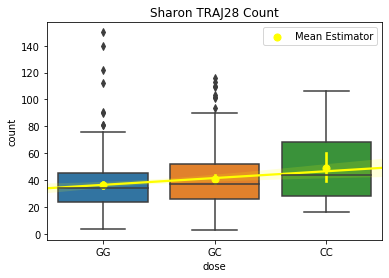

In [8]:
drawFamilyBoxPlots("TRAJ28")

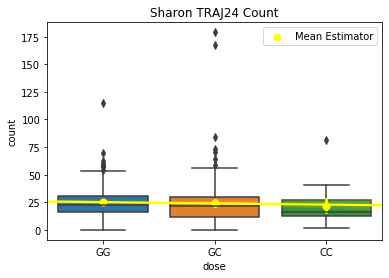

In [9]:
drawFamilyBoxPlots("TRAJ24")

In [10]:
patid = "LD0264"
patid_family_count_df = pickle.load(open("patid_family_count_df.pkl", "rb"))

In [11]:
sharon_set = set(sharon_patid_family_count_df.family.unique())
my_set = set(patid_family_count_df.family.unique())
print("Common TCR families: {}\n".format(len(sharon_set.intersection(my_set))))
print("TCR families missing in Sharon: {}\n".format(my_set.difference(sharon_set)))
print("TCR families missing in me: {}".format(sharon_set.difference(my_set)))
common_J_families = sharon_set.intersection(my_set)

Common TCR families: 51

TCR families missing in Sharon: {'TRAJ05', 'TRAJ46', 'TRAJ08', 'TRAJ01', 'TRAJ25', 'TRBJ1-6', 'TRAJ09', 'TRBJ1-2', 'TRAJ07', 'TRBJ1-3', 'TRAJ03', 'TRAJ04', 'TRAJ14', 'TRBJ1-4', 'TRBJ1-5', 'TRAJ19', 'TRAJ61', 'TRAJ02', 'TRBJ1-1', 'TRAJ06'}

TCR families missing in me: {'TRGV3', 'TRAV14DV4', 'TRAV1-2', 'TRAV19', 'TRAV4', 'TRBV7-4', 'TRAV40', 'TRBV25-1', 'TRBV1', 'TRAJ3', 'TRBV5-6', 'TRAV26-1', 'TRBV5-4', 'TRBV6-1', 'TRAJ1', 'TRDJ1', 'TRBV5-7', 'TRBV30', 'TRBV3-1', 'TRAV9-2', 'TRGVB', 'TRGV1', 'TRGV2', 'TRAV13-2', 'TRBV7-1', 'TRAV20', 'TRGJP2', 'TRDC', 'TRAJ8', 'TRGJP1', 'TRAV41', 'TRAV21', 'TRGV8', 'TRBV7-6', 'TRBV27', 'TRDJ3', 'TRAJ2', 'TRBV9', 'TRAV12-3', 'TRAV22', 'TRAV29DV5', 'TRAV8-2', 'TRBV11-1', 'TRAJ7', 'TRAV8-3', 'TRAV25', 'TRAV17', 'TRGC1', 'TRDV1', 'TRBV6-8', 'TRAV36DV7', 'TRAV8-4', 'TRAV35', 'TRAV39', 'TRAV3', 'TRAV34', 'TRAV10', 'TRBV6-6', 'TRAV30', 'TRDJ2', 'TRBV7-5', 'TRBV12-2', 'TRAJ6', 'TRBV23-1', 'TRBV2', 'TRBV21-1', 'TRAC', 'TRGV7', 'TRAV26-2',

In [12]:
my_df = patid_family_count_df[patid_family_count_df['family'].isin(common_J_families)]
my_df = my_df[my_df['patid']==patid][['family', 'count']].sort_values('family')
my_counts = my_df['count'].values

In [13]:
my_df.sort_values("count", ascending=False).head() # top count familie

,family,count
12704,TRBJ2-3,234
12701,TRBJ2-1,162
12708,TRBJ2-7,135
12706,TRBJ2-5,117
12702,TRBJ2-2,92


In [14]:
sharon_df = sharon_patid_family_count_df[sharon_patid_family_count_df['family'].isin(common_J_families)]
sharon_df = sharon_df[sharon_df['patid']==patid][['family', 'count']].sort_values('family')
sharon_counts = sharon_df['count'].values

In [15]:
sharon_df.sort_values("count", ascending=False).head() # top count familie

,family,count
31211,TRBJ2-3,606
31208,TRBJ2-1,385
31215,TRBJ2-7,342
31210,TRBJ2-2P,217
31213,TRBJ2-5,182


In [16]:
assert len(my_counts) == len(sharon_counts)

In [17]:
print(np.sum(my_counts), np.sum(sharon_counts))

1200 2656


Text(0.5, 1.0, 'counts for LD0264')

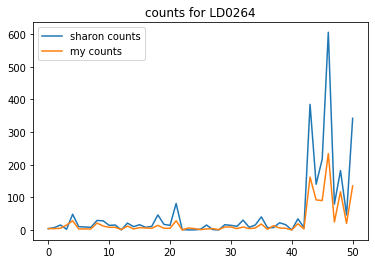

In [18]:
plt.plot(sharon_counts, label="sharon counts")
plt.plot(my_counts, label="my counts")
plt.legend()
plt.title("counts for {}".format(patid))

In [86]:
merged_df = pd.merge(my_df, sharon_df, on="family")

In [105]:
merged_df['logx'] = np.log(merged_df['count_x']+1)
merged_df['logy'] = np.log(merged_df['count_y']+1)

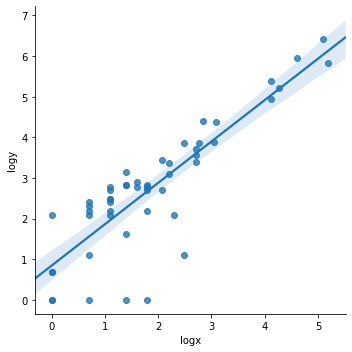

In [106]:
ax = sns.lmplot(x="logx", y="logy", data=merged_df)